<a href="https://colab.research.google.com/github/IvanCampos11/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DS_432_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [2]:
def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X, y = shuffle(X, y)


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

  return X_train, y_train, X_test, y_test

In [4]:
X_train, y_train, X_test, y_test = load_quickdraw10('quickdraw10.npz')

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(80000, 784)
X_test = X_test.reshape(20000, 784)

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
##### Your Code Here #####

def create_model(lr=.01):
  opt = SGD(learning_rate=lr)

  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [8]:
quickdraw_model = create_model()

In [9]:
quickdraw_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [10]:
quickdraw_model_32 = create_model()

bt_default = quickdraw_model_32.fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1370 - accuracy: 0.6429 - val_loss: 0.8456 - val_accuracy: 0.7488
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7845 - accuracy: 0.7724 - val_loss: 0.7404 - val_accuracy: 0.7821
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7086 - accuracy: 0.7937 - val_loss: 0.6837 - val_accuracy: 0.8041
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6614 - accuracy: 0.8071 - val_loss: 0.6552 - val_accuracy: 0.8094
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6279 - accuracy: 0.8163 - val_loss: 0.6268 - val_accuracy: 0.8180
Epoch 6/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6012 - accuracy: 0.8226 - val_loss: 0.6083 - val_accuracy: 0.8221
Epoch 7/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5802 - accuracy: 0.8290 - val_loss: 0.5946 - val_accuracy:

In [11]:
quickdraw_model_8 = create_model()

bt_8 = quickdraw_model_8.fit(X_train, y_train,
                                epochs=25,
                                batch_size=8,
                                validation_data=(X_test, y_test))

Epoch 1/25
10000/10000 [==============================] - 21s 2ms/step - loss: 0.8864 - accuracy: 0.7309 - val_loss: 0.6778 - val_accuracy: 0.7975
Epoch 2/25
10000/10000 [==============================] - 21s 2ms/step - loss: 0.6397 - accuracy: 0.8095 - val_loss: 0.6126 - val_accuracy: 0.8178
Epoch 3/25
10000/10000 [==============================] - 21s 2ms/step - loss: 0.5785 - accuracy: 0.8252 - val_loss: 0.5739 - val_accuracy: 0.8279
Epoch 4/25
10000/10000 [==============================] - 21s 2ms/step - loss: 0.5438 - accuracy: 0.8359 - val_loss: 0.5522 - val_accuracy: 0.8335
Epoch 5/25
10000/10000 [==============================] - 21s 2ms/step - loss: 0.5200 - accuracy: 0.8428 - val_loss: 0.5500 - val_accuracy: 0.8326
Epoch 6/25
10000/10000 [==============================] - 21s 2ms/step - loss: 0.4997 - accuracy: 0.8480 - val_loss: 0.5459 - val_accuracy: 0.8375
Epoch 7/25
10000/10000 [==============================] - 21s 2ms/step - loss: 0.4864 - accuracy: 0.8532 - val_loss: 0

In [12]:
quickdraw_model_16 = create_model()

bt_16 = quickdraw_model_16.fit(X_train, y_train,
                                epochs=25,
                                batch_size=16,
                                validation_data=(X_test, y_test))

Epoch 1/25
5000/5000 [==============================] - 11s 2ms/step - loss: 0.9624 - accuracy: 0.7098 - val_loss: 0.7846 - val_accuracy: 0.7699
Epoch 2/25
5000/5000 [==============================] - 11s 2ms/step - loss: 0.7175 - accuracy: 0.7888 - val_loss: 0.6661 - val_accuracy: 0.8030
Epoch 3/25
5000/5000 [==============================] - 11s 2ms/step - loss: 0.6418 - accuracy: 0.8085 - val_loss: 0.6297 - val_accuracy: 0.8095
Epoch 4/25
5000/5000 [==============================] - 11s 2ms/step - loss: 0.5958 - accuracy: 0.8215 - val_loss: 0.5909 - val_accuracy: 0.8264
Epoch 5/25
5000/5000 [==============================] - 11s 2ms/step - loss: 0.5635 - accuracy: 0.8300 - val_loss: 0.5748 - val_accuracy: 0.8299
Epoch 6/25
5000/5000 [==============================] - 11s 2ms/step - loss: 0.5390 - accuracy: 0.8376 - val_loss: 0.5564 - val_accuracy: 0.8369
Epoch 7/25
5000/5000 [==============================] - 11s 2ms/step - loss: 0.5196 - accuracy: 0.8437 - val_loss: 0.5493 - val_ac

In [13]:
quickdraw_model_512 = create_model()

bt_512 = quickdraw_model_512.fit(X_train, y_train,
                                epochs=25,
                                batch_size=512,
                                validation_data=(X_test, y_test))

Epoch 1/25
157/157 [==============================] - 1s 4ms/step - loss: 2.0907 - accuracy: 0.2497 - val_loss: 1.8614 - val_accuracy: 0.3455
Epoch 2/25
157/157 [==============================] - 1s 4ms/step - loss: 1.6922 - accuracy: 0.4282 - val_loss: 1.5179 - val_accuracy: 0.5321
Epoch 3/25
157/157 [==============================] - 1s 4ms/step - loss: 1.4200 - accuracy: 0.5663 - val_loss: 1.3059 - val_accuracy: 0.6055
Epoch 4/25
157/157 [==============================] - 1s 3ms/step - loss: 1.2528 - accuracy: 0.6186 - val_loss: 1.1762 - val_accuracy: 0.6428
Epoch 5/25
157/157 [==============================] - 1s 4ms/step - loss: 1.1454 - accuracy: 0.6551 - val_loss: 1.0907 - val_accuracy: 0.6750
Epoch 6/25
157/157 [==============================] - 1s 4ms/step - loss: 1.0714 - accuracy: 0.6813 - val_loss: 1.0298 - val_accuracy: 0.6959
Epoch 7/25
157/157 [==============================] - 1s 4ms/step - loss: 1.0182 - accuracy: 0.6988 - val_loss: 0.9869 - val_accuracy: 0.7078
Epoch 

In [14]:
quickdraw_model_64 = create_model()

bt_64 = quickdraw_model_64.fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 1.1779 - accuracy: 0.6340 - val_loss: 0.8473 - val_accuracy: 0.7502
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7968 - accuracy: 0.7665 - val_loss: 0.7438 - val_accuracy: 0.7793
Epoch 3/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7148 - accuracy: 0.7901 - val_loss: 0.6885 - val_accuracy: 0.8022
Epoch 4/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6601 - accuracy: 0.8074 - val_loss: 0.6521 - val_accuracy: 0.8126
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6206 - accuracy: 0.8177 - val_loss: 0.6179 - val_accuracy: 0.8221
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5915 - accuracy: 0.8256 - val_loss: 0.5936 - val_accuracy: 0.8274
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5689 - accuracy: 0.8320 - val_loss: 0.5789 - val_accuracy:

In [15]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_default, bt_8, bt_512, bt_64, bt_16], ["32_", "8_", "512_", "64_", "16_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,1.137010,0.642937,0.845633,0.74880,0,32_
1,0.784526,0.772400,0.740449,0.78205,1,32_
2,0.708637,0.793662,0.683689,0.80405,2,32_
3,0.661405,0.807113,0.655222,0.80940,3,32_
4,0.627864,0.816312,0.626799,0.81800,4,32_


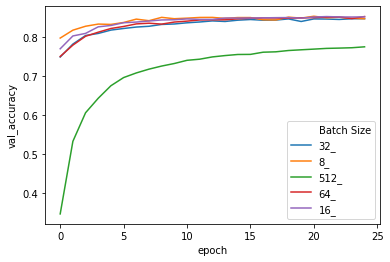

In [16]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

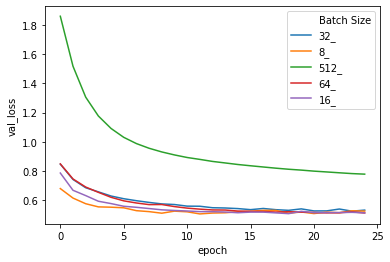

In [17]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [18]:
lr_default = create_model().fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 1.1526 - accuracy: 0.6411 - val_loss: 0.8636 - val_accuracy: 0.7462
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8153 - accuracy: 0.7611 - val_loss: 0.7651 - val_accuracy: 0.7770
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7313 - accuracy: 0.7855 - val_loss: 0.7016 - val_accuracy: 0.7950
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6726 - accuracy: 0.8022 - val_loss: 0.6557 - val_accuracy: 0.8073
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6312 - accuracy: 0.8129 - val_loss: 0.6267 - val_accuracy: 0.8138
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6005 - accuracy: 0.8213 - val_loss: 0.6012 - val_accuracy: 0.8230
Epoch 7/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5766 - accuracy: 0.8285 - val_loss: 0.5904 - val_accuracy:

In [19]:
lr_75 = create_model(lr=.75).fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9543 - accuracy: 0.7036 - val_loss: 0.7744 - val_accuracy: 0.7631
Epoch 2/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7869 - accuracy: 0.7674 - val_loss: 0.7975 - val_accuracy: 0.7664
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7532 - accuracy: 0.7771 - val_loss: 0.7501 - val_accuracy: 0.7754
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7337 - accuracy: 0.7831 - val_loss: 0.7524 - val_accuracy: 0.7883
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7358 - accuracy: 0.7841 - val_loss: 0.8465 - val_accuracy: 0.7644
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7668 - accuracy: 0.7753 - val_loss: 0.7854 - val_accuracy: 0.7726
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7236 - accuracy: 0.7877 - val_loss: 0.7548 - val_accuracy:

In [20]:
lr_0001 = create_model(lr=.0001).fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.2980 - accuracy: 0.1146 - val_loss: 2.2737 - val_accuracy: 0.1245
Epoch 2/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.2553 - accuracy: 0.1327 - val_loss: 2.2357 - val_accuracy: 0.1393
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.2191 - accuracy: 0.1496 - val_loss: 2.1990 - val_accuracy: 0.1572
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1820 - accuracy: 0.1695 - val_loss: 2.1602 - val_accuracy: 0.1812
Epoch 5/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.1420 - accuracy: 0.1939 - val_loss: 2.1177 - val_accuracy: 0.2104
Epoch 6/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.0977 - accuracy: 0.2239 - val_loss: 2.0707 - val_accuracy: 0.2438
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0489 - accuracy: 0.2588 - val_loss: 2.0189 - val_accuracy:

In [21]:
lr_1 = create_model(lr=1.0).fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 1.9996 - accuracy: 0.2071 - val_loss: 1.9744 - val_accuracy: 0.1896
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0590 - accuracy: 0.1862 - val_loss: 2.0577 - val_accuracy: 0.1622
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9933 - accuracy: 0.2133 - val_loss: 1.8624 - val_accuracy: 0.2401
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.8906 - accuracy: 0.2403 - val_loss: 1.8851 - val_accuracy: 0.2398
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.8741 - accuracy: 0.2433 - val_loss: 1.8981 - val_accuracy: 0.2356
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9575 - accuracy: 0.2014 - val_loss: 2.0717 - val_accuracy: 0.1764
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.9571 - accuracy: 0.1875 - val_loss: 1.9585 - val_accuracy:

In [22]:
lr_001 = create_model(lr=.001).fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.1596 - accuracy: 0.2585 - val_loss: 1.9273 - val_accuracy: 0.3991
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6367 - accuracy: 0.4962 - val_loss: 1.3736 - val_accuracy: 0.5844
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2449 - accuracy: 0.6242 - val_loss: 1.1290 - val_accuracy: 0.6559
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0816 - accuracy: 0.6722 - val_loss: 1.0252 - val_accuracy: 0.6888
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0043 - accuracy: 0.6969 - val_loss: 0.9709 - val_accuracy: 0.7057
Epoch 6/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9596 - accuracy: 0.7116 - val_loss: 0.9365 - val_accuracy: 0.7171
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.9284 - accuracy: 0.7232 - val_loss: 0.9109 - val_accuracy:

In [23]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_default, lr_0001, lr_75, lr_1, lr_001], [".01_", ".0001_", ".75_", "1.0_", ".001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,1.152633,0.641150,0.863618,0.74615,0,.01_
1,0.815289,0.761125,0.765071,0.77700,1,.01_
2,0.731292,0.785550,0.701647,0.79495,2,.01_
3,0.672628,0.802163,0.655744,0.80725,3,.01_
4,0.631182,0.812900,0.626684,0.81385,4,.01_


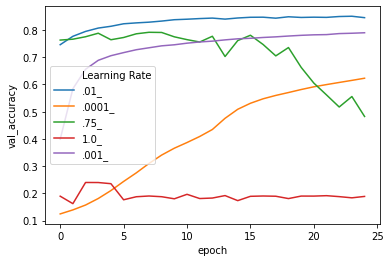

In [24]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

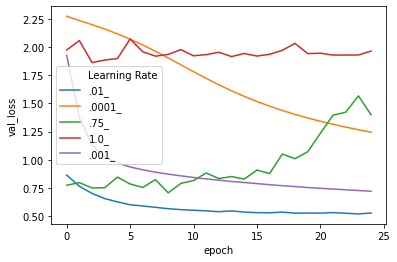

In [25]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [26]:
def create_model(lr=.01, optimize='adam'):

  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(optimizer=optimize, loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [27]:
opt_1 = create_model().fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.7843 - accuracy: 0.7646 - val_loss: 0.6513 - val_accuracy: 0.8056
Epoch 2/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5840 - accuracy: 0.8253 - val_loss: 0.5688 - val_accuracy: 0.8328
Epoch 3/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5366 - accuracy: 0.8389 - val_loss: 0.5574 - val_accuracy: 0.8356
Epoch 4/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5059 - accuracy: 0.8475 - val_loss: 0.5455 - val_accuracy: 0.8403
Epoch 5/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4852 - accuracy: 0.8537 - val_loss: 0.5329 - val_accuracy: 0.8463
Epoch 6/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4688 - accuracy: 0.8583 - val_loss: 0.5361 - val_accuracy: 0.8440
Epoch 7/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.4562 - accuracy: 0.8625 - val_loss: 0.5324 - val_accuracy:

In [28]:
opt_2 = create_model(optimize='sgd').fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 1.1681 - accuracy: 0.6368 - val_loss: 0.8757 - val_accuracy: 0.7310
Epoch 2/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.8153 - accuracy: 0.7598 - val_loss: 0.7707 - val_accuracy: 0.7721
Epoch 3/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.7356 - accuracy: 0.7844 - val_loss: 0.7112 - val_accuracy: 0.7927
Epoch 4/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6778 - accuracy: 0.8001 - val_loss: 0.6629 - val_accuracy: 0.8044
Epoch 5/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6363 - accuracy: 0.8125 - val_loss: 0.6409 - val_accuracy: 0.8113
Epoch 6/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6050 - accuracy: 0.8220 - val_loss: 0.6150 - val_accuracy: 0.8194
Epoch 7/25
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5818 - accuracy: 0.8277 - val_loss: 0.5972 - val_accuracy:

In [29]:
opt_3 = create_model(optimize='ftrl').fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3026 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0997
Epoch 2/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.0997
Epoch 3/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.0997
Epoch 4/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.0997
Epoch 5/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.0984
Epoch 6/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3026 - val_accuracy: 0.0984
Epoch 7/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy:

In [30]:
opt_4 = create_model(optimize='adamax').fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 7s 3ms/step - loss: 0.9323 - accuracy: 0.7221 - val_loss: 0.7339 - val_accuracy: 0.7883
Epoch 2/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6930 - accuracy: 0.7974 - val_loss: 0.6574 - val_accuracy: 0.8098
Epoch 3/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6306 - accuracy: 0.8152 - val_loss: 0.6193 - val_accuracy: 0.8191
Epoch 4/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5929 - accuracy: 0.8249 - val_loss: 0.6040 - val_accuracy: 0.8242
Epoch 5/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5672 - accuracy: 0.8327 - val_loss: 0.5897 - val_accuracy: 0.8312
Epoch 6/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5472 - accuracy: 0.8376 - val_loss: 0.5722 - val_accuracy: 0.8337
Epoch 7/25
2500/2500 [==============================] - 6s 2ms/step - loss: 0.5290 - accuracy: 0.8433 - val_loss: 0.5620 - val_accuracy:

In [31]:
opt_5 = create_model(optimize='adadelta').fit(X_train, y_train,
                                epochs=25,
                                validation_data=(X_test,y_test)
)

Epoch 1/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3347 - accuracy: 0.1212 - val_loss: 2.3052 - val_accuracy: 0.1419
Epoch 2/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.2812 - accuracy: 0.1613 - val_loss: 2.2569 - val_accuracy: 0.1872
Epoch 3/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.2351 - accuracy: 0.2081 - val_loss: 2.2113 - val_accuracy: 0.2422
Epoch 4/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.1892 - accuracy: 0.2606 - val_loss: 2.1636 - val_accuracy: 0.2892
Epoch 5/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.1410 - accuracy: 0.3009 - val_loss: 2.1133 - val_accuracy: 0.3231
Epoch 6/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.0903 - accuracy: 0.3317 - val_loss: 2.0610 - val_accuracy: 0.3507
Epoch 7/25
2500/2500 [==============================] - 6s 2ms/step - loss: 2.0377 - accuracy: 0.3577 - val_loss: 2.0069 - val_accuracy:

In [32]:
batch_sizes = []

for exp, result in zip([opt_1, opt_2, opt_3, opt_4, opt_5], ["opt_1_", "opt_2_", "opt_3_", "opt_4_", "opt_5_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.784316,0.764650,0.651344,0.80560,0,opt_1_
1,0.583980,0.825275,0.568824,0.83285,1,opt_1_
2,0.536558,0.838888,0.557436,0.83555,2,opt_1_
3,0.505894,0.847475,0.545529,0.84030,3,opt_1_
4,0.485154,0.853737,0.532894,0.84630,4,opt_1_


In [35]:
 batch_sizes = []

for exp, result in zip([opt_1, opt_2, opt_3, opt_4, opt_5], ["opt_1_", "opt_2_", "opt_3_", "opt_4_", "opt_5_"]):
 
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.784316,0.764650,0.651344,0.80560,0,opt_1_
1,0.583980,0.825275,0.568824,0.83285,1,opt_1_
2,0.536558,0.838888,0.557436,0.83555,2,opt_1_
3,0.505894,0.847475,0.545529,0.84030,3,opt_1_
4,0.485154,0.853737,0.532894,0.84630,4,opt_1_


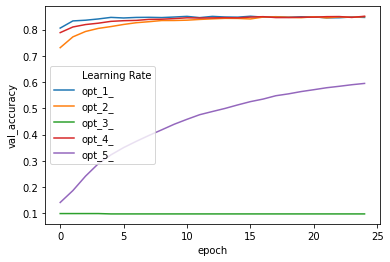

In [33]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

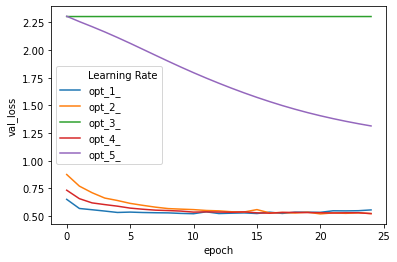

In [34]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

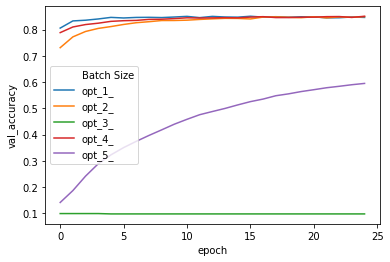

In [36]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

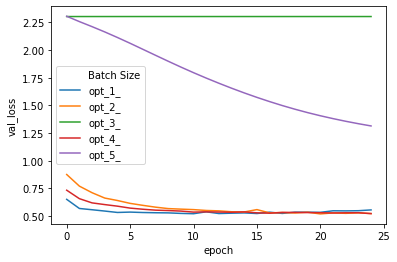

In [37]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
BackPropagation is a way of calculating the loss of the model from the true values but it's also based on each individual weights giving a more acurate reading and making so that it gradually improves the loss at each iteration.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


